# Proyecto 03 - Procesamiento del Lenguaje Natural

## Dataset: The Multilingual Amazon Reviews Corpus

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Es un archivo .zip que contiene tres documentos. Más información sobre el dataset [aquí](https://registry.opendata.aws/amazon-reviews-ml/). Es importante que tengas en cuenta la [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt) de este dataset.**

### Exploración de datos y Procesamiento del Lenguaje Natural

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Considera que hasta que no hayas aplicado las herramientas de Procesamiento del Lenguaje Natural vistas, será difícil completar este análisis. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿qué palabras están asociadas a calificaciones positivas y qué palabras a calificaciones negativas?

### Machine Learning

Implementa un modelo que, dada la crítica de un producto, asigne la cantidad de estrellas correspondiente. **Para pensar**: ¿es un problema de Clasificación o de Regresión?

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

**Recomendación:** si no te resulta conveniente trabajar en español con NLTK, te recomendamos que explores la librería [spaCy](https://spacy.io/).

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Valdrá la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar únicamente las etiquetas Positiva y Negativa a cada crítica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qué situación puede ser útil. ¿Esperas que el desempeño sea mejor o peor?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### Parte A - Exploración de Datos.
Todo proyecto de Ciencia de Datos empieza con un Análisis Exploratorio de Datos. Y todo Análisis Exploratorio de Datos debe responder preguntas.

El conjunto de datos contiene reseñas en inglés, japonés, alemán, francés, chino y español, recopiladas entre el 1 de noviembre de 2015 y el 1 de noviembre de 2019. Cada registro del conjunto de datos contiene el texto de la reseña, el título de la reseña, la calificación con estrellas y un revisor anónimo. ID, una ID de producto anónima y la categoría de producto de grano grueso (por ejemplo, "libros", "electrodomésticos", etc.)

In [1]:
import itertools

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import nltk

# Esto sirve para configurar NLTK. La primera vez puede tardar un poco
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/mbernal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mbernal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
dataset_dev = pd.read_json('dataset_es_dev.json', lines= True)
dataset_test = pd.read_json('dataset_es_test.json', lines= True)
dataset_train = pd.read_json('dataset_es_train.json', lines= True)

### Cuantos registros y columnas tienen los dataset?

In [3]:
print(dataset_dev.shape)
dataset_dev.head()

(5000, 8)


,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty


In [4]:
print(dataset_test.shape)
dataset_test.head()

(5000, 8)


,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0038754,product_es_0113523,reviewer_es_0580071,1,no me llego el articulo me lo mando por correo...,no me llego,es,wireless
1,es_0748979,product_es_0017036,reviewer_es_0819733,1,"la mensajería horrible, no compro mas",amazon sigue sin cumplir en las entregas,es,home
2,es_0411746,product_es_0138642,reviewer_es_0508607,1,Estoy muy decepcionado con el vendedor ya que ...,ESTAFA EN EL ENVÍO,es,toy
3,es_0786686,product_es_0170887,reviewer_es_0491157,1,Mi valoración no es sobre el producto sino sob...,Estafa de Amazon,es,home
4,es_0429700,product_es_0710642,reviewer_es_0008745,1,Pues tenía interés en este libro y probé la ve...,No conseguí pasar de la portada en Kindle,es,digital_ebook_purchase


In [5]:
print(dataset_train.shape)
dataset_train.head()

(200000, 8)


,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


### Informacion estadistica de los dataset

In [6]:
print(dataset_dev.describe())
print(dataset_test.describe())
print(dataset_train.describe())

             stars
count  5000.000000
mean      3.000000
std       1.414355
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
             stars
count  5000.000000
mean      3.000000
std       1.414355
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
               stars
count  200000.000000
mean        3.000000
std         1.414217
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000


### Como estan distribuidos los dataset?

/home/mbernal/miniconda3/envs/datascience/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


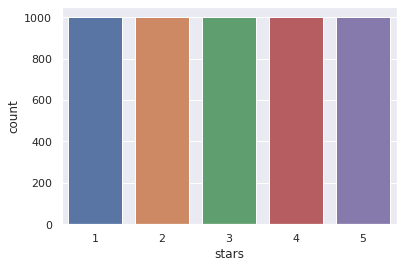

In [7]:
sns.countplot(dataset_dev.stars)
plt.show()

/home/mbernal/miniconda3/envs/datascience/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


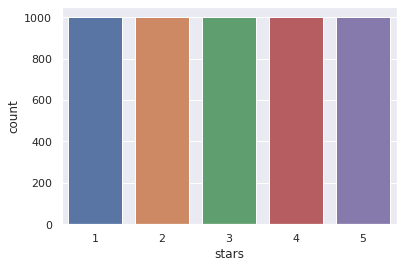

In [8]:
sns.countplot(dataset_test.stars)
plt.show()

/home/mbernal/miniconda3/envs/datascience/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


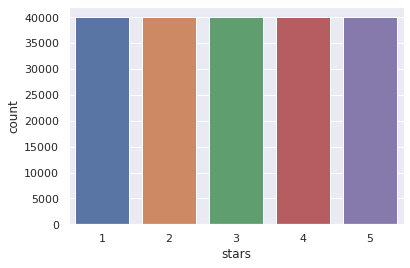

In [9]:
sns.countplot(dataset_train.stars)
plt.show()

In [10]:
#dataset_dev['stars'].value_counts(normalize=True)
print(dataset_dev['stars'].value_counts())
print(dataset_test['stars'].value_counts())
print(dataset_train['stars'].value_counts())

3    1000
2    1000
5    1000
1    1000
4    1000
Name: stars, dtype: int64
3    1000
2    1000
5    1000
1    1000
4    1000
Name: stars, dtype: int64
5    40000
4    40000
3    40000
2    40000
1    40000
Name: stars, dtype: int64


In [11]:
print(dataset_dev['language'].value_counts())
print(dataset_test['language'].value_counts())
print(dataset_train['language'].value_counts())

es    5000
Name: language, dtype: int64
es    5000
Name: language, dtype: int64
es    200000
Name: language, dtype: int64


### Se encuentran datos nulos en los dataset?

In [12]:
dataset_dev.isna().sum()

review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64

In [13]:
dataset_test.isna().sum()

review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64

In [14]:
dataset_train.isna().sum()

review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64

### Parte B - Modelo de Machine Learning.
En esta sección deberás aplicar las técnicas de Machine Learning aprendidas para crear un modelo predictivo a partir del dataset provisto.

Implementa un modelo que, dada la crítica de un producto, asigne la cantidad de estrellas correspondiente. **Para pensar**: ¿es un problema de Clasificación o de Regresión?

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

Stopwords

In [3]:
stopwords = nltk.corpus.stopwords.words('spanish')
stopwords

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [4]:
dataset_test_mod = pd.concat([dataset_test.review_title,dataset_test.review_body,dataset_test.stars],axis=1)
dataset_train_mod = pd.concat([dataset_train.review_title,dataset_train.review_body,dataset_train.stars],axis=1)
dataset_train_mod.head()

,review_title,review_body,stars
0,television Nevir,Nada bueno se me fue ka pantalla en menos de 8...,1
1,Dinero tirado a la basura con esta compra,"Horrible, nos tuvimos que comprar otro porque ...",1
2,solo llega una unidad cuando te obligan a comp...,Te obligan a comprar dos unidades y te llega s...,1
3,PRODUCTO NO RECIBIDO.,"No entro en descalificar al vendedor, solo pue...",1
4,Devuelto,Llega tarde y co la talla equivocada,1


### Stemming

Tomar del dataset solo las columnas de interes

In [5]:
# Importamos esta libreria que nos permite reemplazar caracteres
import re

# Importamos la función que nos permite Stemmizar de nltk y definimos el stemmer
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [6]:
# Recorremos todos los titulos y le vamos aplicando la Normalizacion y luega el Stemming a cada uno
review_list_test=[]
for review in dataset_test_mod.review_title + ", " + dataset_test_mod.review_body:
    # Pasamos todo a minúsculas
    review = review.lower()
    # Reemplazar tildes
    review = review.replace('á', 'a')
    review = review.replace('é', 'e')
    review = review.replace('í', 'i')
    review = review.replace('ó', 'o')
    review = review.replace('ú', 'u')
    review = review.replace('ñ', 'n')
    # Vamos a reemplzar los caracteres que no sean letras por espacios
    review = re.sub("[^a-zA-Z]"," ", str(review))
    # Tokenizamos para separar las palabras del review
    review = nltk.word_tokenize(review)
    # Eliminamos las palabras de menos de 3 letras
    review = [palabra for palabra in review if len(palabra) > 3]
    # Sacamos las Stopwords
    review = [palabra for palabra in review if not palabra in stopwords]
    
    ## Hasta acá Normalizamos, ahora a stemmizar
    
    # Aplicamos la funcion para buscar la raiz de las palabras
    review = [stemmer.stem(palabra) for palabra in review]
    # Por ultimo volvemos a unir el titular
    review=" ".join(review)
    
    # Vamos armando una lista con todos los titulares
    review_list_test.append(review)

In [7]:
# Recorremos todos los titulos y le vamos aplicando la Normalizacion y luega el Stemming a cada uno
review_list_train=[]
for review in dataset_train_mod.review_title + ", " + dataset_train_mod.review_body:
    # Pasamos todo a minúsculas
    review = review.lower()
    # Reemplazar tildes
    review = review.replace('á', 'a')
    review = review.replace('é', 'e')
    review = review.replace('í', 'i')
    review = review.replace('ó', 'o')
    review = review.replace('ú', 'u')
    review = review.replace('ñ', 'n')
    # Vamos a reemplzar los caracteres que no sean letras por espacios
    review = re.sub("[^a-zA-Z]"," ", str(review))
    # Tokenizamos para separar las palabras del review
    review = nltk.word_tokenize(review)
    # Eliminamos las palabras de menos de 3 letras
    review = [palabra for palabra in review if len(palabra) > 3]
    # Sacamos las Stopwords
    review = [palabra for palabra in review if not palabra in stopwords]
    
    ## Hasta acá Normalizamos, ahora a stemmizar
    
    # Aplicamos la funcion para buscar la raiz de las palabras
    review = [stemmer.stem(palabra) for palabra in review]
    # Por ultimo volvemos a unir el titular
    review=" ".join(review)
    
    # Vamos armando una lista con todos los titulares
    review_list_train.append(review)

In [25]:
review_list

['televis nevir bueno pantalla meno mese recibido respuesta fabricant',
 'dinero tirado basura compra horribl comprar sabemo ingl informatico despu hora capaz instalarlo',
 'solo llega unidad obligan comprar obligan comprar unidad llega solo forma reclamar autentica estafa comprei',
 'producto recibido entro descalificar vendedor solo puedo decir tra mese espera sigo producto contactar amazon reclamar reembolso amazon hace cargo problema desembolsado dinero mese devuelven perdida tiempo total palabra usted deciden',
 'devuelto llega tard talla equivocada',
 'jama llego jama llego vendedor nunca contacto conmigo pesar intentarlo vece',
 'horroroso paragua mala calidad sensacion romper abr cutr',
 'funcion devolverla triangular agarra forma comoda escritura bonita calidad precio acept funcion',
 'llego esperando despu protestar varia vece solucion hacei caso dicen reembolso quiero auricular',
 'mala calidad defectuoso defectuoso apariencia bien producto tercer vaso mezclador grand dejado

Agregamos al dataset una columna llamado review_stem que contenga los reviews stemmizados

In [8]:
dataset_test_mod["review_stem"] = review_list_test
dataset_train_mod["review_stem"] = review_list_train
dataset_train_mod.tail()

,review_title,review_body,stars,review_stem
199995,Tal y como se describe,Mando funciona perfectamente y cumple con toda...,5,describ mando funciona perfectament cumpl toda...
199996,Funciona perfectamente,"Compré la batería con cierta reticencia, pero ...",5,funciona perfectament compr bateria cierta ret...
199997,Buena calidad.,Buena calidad. Satisfecha con la compra.,5,buena calidad buena calidad satisfecha compra
199998,Recomendado,Perfecto para el cumple de mi hijo,5,recomendado perfecto cumpl hijo
199999,Preciosas,"Súper bien! Las brochas son buenas, no sé meno...",5,preciosa super bien brocha buena meno caido pe...


### Lemmatization

In [9]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  d all


       | 
       | Downloading package abc to /home/mbernal/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /home/mbernal/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package biocreative_ppi to
       |     /home/mbernal/nltk_data...
       |   Package biocreative_ppi is already up-to-date!
       | Downloading package brown to /home/mbernal/nltk_data...
       |   Package brown is already up-to-date!
       | Downloading package brown_tei to /home/mbernal/nltk_data...
       |   Package brown_tei is already up-to-date!
       | Downloading package cess_cat to /home/mbernal/nltk_data...
       |   Package cess_cat is already up-to-date!
       | Downloading package cess_esp to /home/mbernal/nltk_data...
       |   Package cess_esp is already up-to-date!
       | Downloading package chat80 to /home/mbernal/nltk_data...
       |   Package chat80 is already up-to-date!
       | Downloading package city


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  q


True

In [10]:
# Importamos esta libreria que nos permite reemplzar caracteres
import re

# Importamos el lemmatizar de NLTK, y creamos el objeto
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

Las etiquetas refieren al tipo de palabra. Vamos a definir una función para traducir estas etiquetas a los valores de POS que entiende wordnet_lemmatizer.

In [11]:
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [12]:
review_list_test=[]
for review in dataset_test_mod.review_title + ", " + dataset_test_mod.review_body:
    # Pasamos todo a minúsculas
    review = review.lower()

    # Reemplazar tildes
    review = review.replace('á', 'a')
    review = review.replace('é', 'e')
    review = review.replace('í', 'i')
    review = review.replace('ó', 'o')
    review = review.replace('ú', 'u')
    review = review.replace('ñ', 'n')

    # Vamos a reemplazar los caracteres que no sean letras por espacios
    review = re.sub("[^a-zA-Z]"," ", str(review))
    # Tokenizamos para separar las palabras
    review = nltk.word_tokenize(review)
    
    # Aplicamos el Lemmatizer (Esto puede tardar un ratito)
    review_lemma = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in review]
    
    # Eliminamos las palabras de al menos 3 letras
    review = [palabra for palabra in review if len(palabra) > 3]
    # Sacamos las Stopwords
    review = [palabra for palabra in review if not palabra in stopwords]
    
    # Por ultimo volvemos a unir el titular
    review = " ".join(review)
    #dataset["titular_normalizado"] = titular_list
    review_list_test.append(review)

In [13]:
review_list_train=[]
for review in dataset_train_mod.review_title + ", " + dataset_train_mod.review_body:
    # Pasamos todo a minúsculas
    review = review.lower()

    # Reemplazar tildes
    review = review.replace('á', 'a')
    review = review.replace('é', 'e')
    review = review.replace('í', 'i')
    review = review.replace('ó', 'o')
    review = review.replace('ú', 'u')
    review = review.replace('ñ', 'n')

    # Vamos a reemplazar los caracteres que no sean letras por espacios
    review = re.sub("[^a-zA-Z]"," ", str(review))
    # Tokenizamos para separar las palabras
    review = nltk.word_tokenize(review)
    
    # Aplicamos el Lemmatizer (Esto puede tardar un ratito)
    review_lemma = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in review]
    
    # Eliminamos las palabras de al menos 3 letras
    review = [palabra for palabra in review if len(palabra) > 3]
    # Sacamos las Stopwords
    review = [palabra for palabra in review if not palabra in stopwords]
    
    # Por ultimo volvemos a unir el titular
    review = " ".join(review)
    #dataset["titular_normalizado"] = titular_list
    review_list_train.append(review)

In [14]:
dataset_test_mod["review_lemm"] = review_list_test
dataset_train_mod["review_lemm"] = review_list_train
dataset_train_mod.tail()

,review_title,review_body,stars,review_stem,review_lemm
199995,Tal y como se describe,Mando funciona perfectamente y cumple con toda...,5,describ mando funciona perfectament cumpl toda...,describe mando funciona perfectamente cumple t...
199996,Funciona perfectamente,"Compré la batería con cierta reticencia, pero ...",5,funciona perfectament compr bateria cierta ret...,funciona perfectamente compre bateria cierta r...
199997,Buena calidad.,Buena calidad. Satisfecha con la compra.,5,buena calidad buena calidad satisfecha compra,buena calidad buena calidad satisfecha compra
199998,Recomendado,Perfecto para el cumple de mi hijo,5,recomendado perfecto cumpl hijo,recomendado perfecto cumple hijo
199999,Preciosas,"Súper bien! Las brochas son buenas, no sé meno...",5,preciosa super bien brocha buena meno caido pe...,preciosas super bien brochas buenas menos caid...


### Vectorizar

In [15]:
# Tomamos la lista de palabras y el vector que nos dice la cantidad de estrellas de un review
list_reviews_test = list(dataset_test_mod['review_lemm'].values)
stars_test = dataset_test_mod['stars'].values

list_reviews_train = list(dataset_train_mod['review_lemm'].values)
stars_train = dataset_train_mod['stars'].values

Preparamos el conversor de bag of words a vectores que traemos de sklearn

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

# Usaremos solo las 1000 palabras con mas frecuencia en todo el corpus para generar los vectores
max_features = 1000

# Es decir que cada instancia tendrá 1000 features
cou_vec = CountVectorizer(max_features=max_features, ngram_range=(1, 4)) # stop_words="english" , ngram_range=(1, 2)

In [17]:
matriz_reviews_test = cou_vec.fit_transform(list_reviews_test)
matriz_reviews_train = cou_vec.fit_transform(list_reviews_train)

# Tomamos las palabras
all_words = cou_vec.get_feature_names()

# Vizualizamos las 50 palabras mas usadas
print("50 palabras mas usadas: ", all_words[0:50])

50 palabras mas usadas:  ['abajo', 'abierta', 'abierto', 'abre', 'abrir', 'absoluto', 'acaba', 'acabado', 'acabados', 'acabo', 'accesorios', 'aceite', 'aceptable', 'aconsejo', 'adapta', 'adapta bien', 'adaptador', 'adecuado', 'ademas', 'adhesivo', 'agarre', 'agradable', 'agua', 'aguanta', 'agujero', 'agujeros', 'ahora', 'aire', 'ajusta', 'ajusta bien', 'ajuste', 'alguien', 'algun', 'alguna', 'alta', 'altavoz', 'alto', 'altura', 'amazon', 'ancho', 'anos', 'anterior', 'anuncio', 'apaga', 'aparato', 'aparece', 'aparte', 'apenas', 'aplicacion', 'aqui']


### Modelar

In [18]:
x_test = matriz_reviews_test.toarray()
y_test = stars_test

x_train = matriz_reviews_train.toarray()
y_train = stars_train

from sklearn.model_selection import train_test_split
xtrain_test, xtest_test, ytrain_test, ytest_test = train_test_split(x_test, y_test, test_size = 0.2, random_state = 42, stratify = y_test)
xtrain_train, xtest_train, ytrain_train, ytest_train = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42, stratify = y_train)

Definimos una función que nos permite plotear los resultados en una matriz de confusión.

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def confusion(ytest,y_pred):
    names=["1 Star","2 Star","3 Star","4 Star","5 Star"]
    cm = confusion_matrix(ytest, y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True, linewidth=.5, linecolor="r", fmt=".0f", ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

### Benchmark

Modelo Naive Bayes para tener un benchmark de referencia para el accuracy.

In [20]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain_train, ytrain_train)
print("acc : ", nb.score(xtest_train, ytest_train))

acc :  0.430775


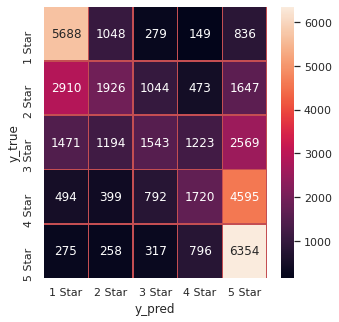

In [21]:
y_pred = nb.predict(xtest_train)
confusion(ytest_train, y_pred)

### Random Forest

### Optimizacion de hiperparametros - Random Search

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

tree = RandomForestClassifier()

# Grilla para Random Search
param_grid = {'n_estimators':[50,100,200],
              'max_depth':np.arange(1, 10),
              'criterion': ['gini', 'entropy'], 
              'max_features':['auto', 'sqrt','log2']}

model = RandomizedSearchCV(tree, param_grid, n_iter=10, random_state=0, cv=5, scoring='accuracy')

In [23]:
model.fit(xtrain_test, ytrain_test)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [50, 100, 200]},
                   random_state=0, scoring='accuracy')

In [24]:
print("Mejores parametros: " + str(model.best_params_))
print("Mejor Score: " + str(model.best_score_)+'\n')

Mejores parametros: {'n_estimators': 200, 'max_features': 'log2', 'max_depth': 5, 'criterion': 'gini'}
Mejor Score: 0.43425



### Ejecución Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

#rf = RandomForestClassifier(n_estimators = 200, random_state=42)
rf = RandomForestClassifier(n_estimators=200, max_features='log2', max_depth=5, criterion='gini', oob_score = True, random_state = 42)
rf.fit(xtrain_train, ytrain_train)
print("acc: ", rf.score(xtest_train, ytest_train))

acc:  0.449375


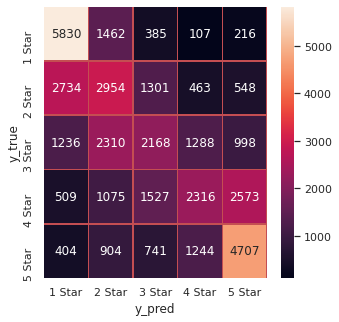

In [47]:
y_pred = rf.predict(xtest_train)
confusion(ytest_train,y_pred)

/home/mbernal/miniconda3/envs/datascience/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


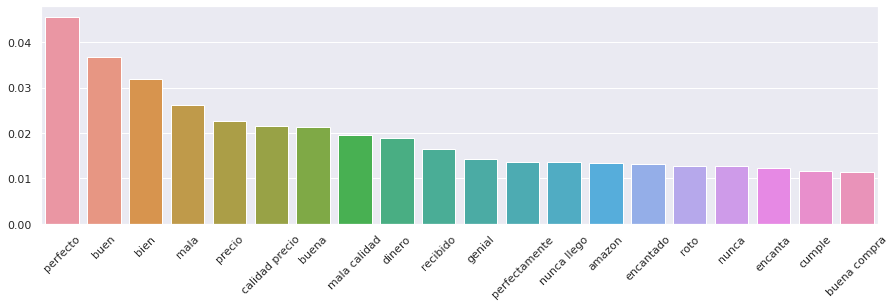

In [27]:
# Le preguntamos la importancia de cada feature (cada palabra)
importances = rf.feature_importances_
# Tomamos la lista de palabras
all_words = cou_vec.get_feature_names()
columns = all_words

# Ordenamos por importnacia y tomamos las 20 primeras
indices = np.argsort(importances)[::-1]
indices = indices[:20]
selected_columns = [columns[i] for i in indices]
selected_importances = importances[indices]

# Por ultimo graficamos
plt.figure(figsize = (15,4))
sns.barplot(selected_columns, selected_importances)
plt.xticks(rotation=45)
plt.show()

### SVM

In [28]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C = 1)
svc.fit(xtrain_train, ytrain_train)
svc.score(xtest_train, ytest_train)

/home/mbernal/miniconda3/envs/datascience/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.50275

Se grafica la matriz de confusión

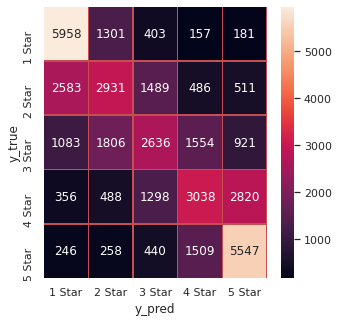

In [29]:
y_pred = svc.predict(xtest_train)
confusion(ytest_train, y_pred)

In [48]:
#precisión, exhaustividad y F-Score

#La precisión es la relación entre las predicciones correctas y el número total de predicciones correctas previstas. 
#Esto mide la precisión del clasificador a la hora de predecir casos positivos
from sklearn.metrics import precision_score
precision_train = precision_score(ytest_train, y_pred, average='macro')
#macro, weighted, micro, None, samples
#precision_test = precision_score(y_test,y_test_pred)
print(precision_train)

0.437142231306799


In [49]:
#exhaustividad
#La sensibilidad también es llamada en inglés recall, 
#es la relación entre las predicciones positivas correctas y el número total de predicciones positivas. 
#O más simplemente, cuán sensible es el clasificador para detectar instancias positivas. 
#Esto también se conoce como la tasa verdadera positiva.
from sklearn.metrics import recall_score
sensibilidad_train = recall_score(ytest_train, y_pred, average='macro')
#sensibilidad_test = recall_score(y_test,y_test_pred)
print(sensibilidad_train)

0.449375


In [50]:
#F-Score
#El puntaje F1 es la medida armónica de la memoria y la precisión, con una puntuación más alta como mejor modelo.
from sklearn.metrics import f1_score
puntaje_train = f1_score(ytest_train, y_pred, average='macro')
#puntaje_test = f1_score(y_test,y_test_pred)
print(puntaje_train)

0.4362818711864545


### Parte C - Investigación.
Las preguntas y cosas para probar nunca se agotan. El objetivo de esta sección es que sugieras cómo continuarías el proyecto, con el fin de mejorar el modelo o responder una pregunta que consideres interesante. En todos los notebooks dejamos algunas sugerencias, pero puedes proponer otras.

### Como propuestas de mejora considero:

### - Ejecutar el ramdon search con mas hiperparametros para el modelo usado.

### - Escalar los datos puede influir en una mejor predicción.

### - Usar spacy para tratar de obtener un mejor resultado en la medida.